In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from sklearn.datasets import make_moons

# STM/N Datasets

In [2]:
data = loadmat('./Synth5C.mat')

# parsing STM data into dataframe
df_STM = pd.DataFrame(columns=['x', 'y', 'class'])

for i in range(len(data['STM'][0])):
    for j in range(len(data['STM'][0][i])):
        row = dict()
        row['x'] = data['STM'][0][i][j][0]
        row['y'] = data['STM'][0][i][j][1]
        row['class'] = data['STM'][0][i][j][2]
        df_STM = df_STM.append(row, ignore_index=True)

# shuffling dataset
df_STM = df_STM.sample(frac=1).reset_index(drop=True)

df_STM.to_pickle('./stm.pkl')

# parsing STMN data into dataframe
df_STMN = pd.DataFrame(columns=['x', 'y', 'class'])

for i in range(len(data['STMN'][0])):
    for j in range(len(data['STMN'][0][i])):
        row = dict()
        row['x'] = data['STMN'][0][i][j][0]
        row['y'] = data['STMN'][0][i][j][1]
        row['class'] = data['STMN'][0][i][j][2]
        df_STMN = df_STMN.append(row, ignore_index=True)

# shuffling dataset
df_STMN = df_STMN.sample(frac=1).reset_index(drop=True)

df_STMN.to_pickle('./stmn.pkl')

# Half-Moons Dataset

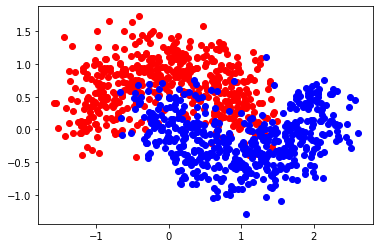

In [17]:
X, y = make_moons(n_samples=(500, 500), shuffle=True, noise=0.3, random_state=100)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue')
plt.show()

df_moons = pd.DataFrame(data=X, columns=['x', 'y'])
df_moons['class'] = y

df_moons.to_pickle('./moons_noise03.pkl')

# Spirals Dataset

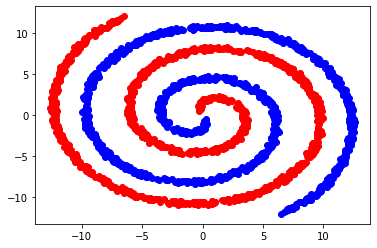

In [7]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

X, y = twospirals(1000)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue')
plt.show()

df_spirals = pd.DataFrame(data=X, columns=['x', 'y'])
df_spirals['class'] = y

df_spirals.to_pickle('./spirals.pkl')